# EDA Subject.csv reduced

In [51]:
import pandas as pd
import numpy as np

### 0. Load file

In [1]:
import pandas as pd
        
subject_reduced = pd.read_csv('../../../data/processed/subject_reduced.csv', dtype = {"ID": str})
subject_reduced

,ID,Age_group_reduced,BMI,Sex
0,0001,0,23.0,1.0
1,0002,0,24.0,1.0
2,0003,2,28.0,1.0
3,0004,1,24.0,0.0
4,0005,0,20.0,1.0
...,...,...,...,...
1088,1117,0,22.0,1.0
1089,1118,3,32.0,1.0
1090,1119,0,26.0,0.0
1091,1120,0,27.0,0.0


In [53]:
subject_reduced.shape

(1093, 4)

### 1 Kiểm tra dữ liệu null

In [54]:
subject_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1093 non-null   int64  
 1   Age_group_reduced  1093 non-null   int64  
 2   BMI                1093 non-null   float64
 3   Sex                1093 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 34.3 KB


- 1 dòng giới tính bị null
-  1 dòng BMI bị null
- 25 subject có age_group bị null

#### 2. Kiểm tra độ cân bằng các nhóm tuổi reduced

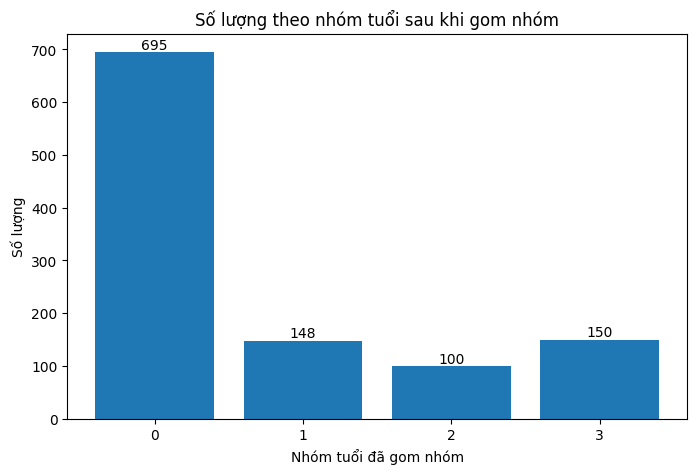

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Sắp xếp nhóm theo thứ tự tăng dần
age_group_counts = (
    subject_reduced['Age_group_reduced']
    .value_counts()
    .sort_index()
)

labels = age_group_counts.index
x_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(x_pos, age_group_counts.values)

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=0)

# Ghi số trên cột
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

ax.set_title('Số lượng theo nhóm tuổi sau khi gom nhóm')
ax.set_xlabel('Nhóm tuổi đã gom nhóm')
ax.set_ylabel('Số lượng')

plt.show()


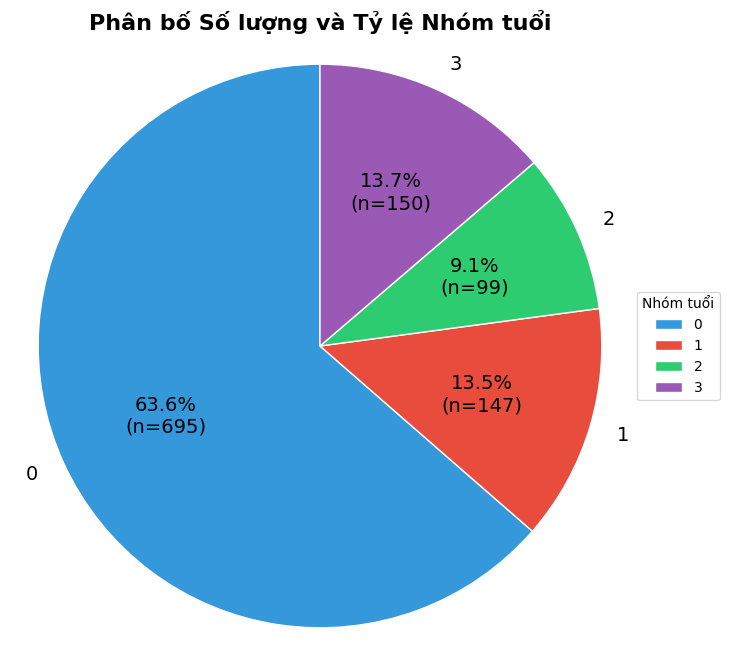

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

counts = age_group_counts = (
    subject_reduced['Age_group_reduced']
    .value_counts()
    .sort_index()
)

total = counts.sum()

flatui = ["#3498db", "#e74c3c", "#2ecc71", "#9b59b6",
          "#f1c40f", "#1abc9c", "#e67e22", "#34495e"]

colors = flatui[:len(counts)]   # 🎨 bảng màu đẹp, nhẹ, dễ nhìn

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    counts,
    labels=counts.index,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n(n={int(p*total/100)})',
    startangle=90,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title('Phân bố Số lượng và Tỷ lệ Nhóm tuổi', fontsize=16, fontweight='bold')

plt.axis('equal')
plt.legend(
    wedges, counts.index,
    title="Nhóm tuổi",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# for autotext in autotexts:
#     autotext.set_color('white')
    # autotext.set_weight('bold')

plt.show()
